In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data/clean_df_with_dummy.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,...,drive-wheels-4wd,drive-wheels-fwd,drive-wheels-rwd,num-of-cylinders-eight,num-of-cylinders-five,num-of-cylinders-four,num-of-cylinders-six,num-of-cylinders-three,num-of-cylinders-twelve,num-of-cylinders-two
0,0,3,122,alfa-romero,convertible,88.6,0.811148,0.890278,0.816054,2548,...,0,0,1,0,0,1,0,0,0,0
1,1,3,122,alfa-romero,convertible,88.6,0.811148,0.890278,0.816054,2548,...,0,0,1,0,0,1,0,0,0,0
2,2,1,122,alfa-romero,hatchback,94.5,0.822681,0.909722,0.876254,2823,...,0,0,1,0,0,0,1,0,0,0
3,3,2,164,audi,sedan,99.8,0.848630,0.919444,0.908027,2337,...,0,1,0,0,0,1,0,0,0,0
4,4,2,164,audi,sedan,99.4,0.848630,0.922222,0.908027,2824,...,1,0,0,0,1,0,0,0,0,0


In [3]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,symboling,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,engine-type,...,drive-wheels-4wd,drive-wheels-fwd,drive-wheels-rwd,num-of-cylinders-eight,num-of-cylinders-five,num-of-cylinders-four,num-of-cylinders-six,num-of-cylinders-three,num-of-cylinders-twelve,num-of-cylinders-two
0,3,122,alfa-romero,convertible,88.6,0.811148,0.890278,0.816054,2548,dohc,...,0,0,1,0,0,1,0,0,0,0
1,3,122,alfa-romero,convertible,88.6,0.811148,0.890278,0.816054,2548,dohc,...,0,0,1,0,0,1,0,0,0,0
2,1,122,alfa-romero,hatchback,94.5,0.822681,0.909722,0.876254,2823,ohcv,...,0,0,1,0,0,0,1,0,0,0
3,2,164,audi,sedan,99.8,0.848630,0.919444,0.908027,2337,ohc,...,0,1,0,0,0,1,0,0,0,0
4,2,164,audi,sedan,99.4,0.848630,0.922222,0.908027,2824,ohc,...,1,0,0,0,1,0,0,0,0,0


# Linear Regression

## Predict Price against Highway-mpg

In [4]:
# making linear regression object for easier calling
lr = LinearRegression()

# assigning 'highway-mpg' as the independent variable and 'price' as the dependent variable
X = df[['highway-mpg']]
Y = df['price']
lr.fit(X,Y)
Yhat = lr.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [5]:
# above code in function form
from sklearn.metrics import mean_squared_error

def linear_regression_modeling(independent_variable,dependent_variable):
    # making linear regression object for easier calling
    lr = LinearRegression()
    # fitting the independent variable(X) and the dependent variable(Y) to Linear Regression 
    lr.fit(independent_variable,dependent_variable)
    # assigning predictions to global variable (Yhat) to be called outside of function, using independent variable(X)
    globals() ['Yhat'] = lr.predict(independent_variable)
    
    ##     𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏𝑋     ##
    # intercept (a)
    print(f'The intercept of the regression line is {lr.intercept_}')
    # slope (b)
    print(f'The slope of the regression line is {lr.coef_}')
    
    # printing the linear regression formula with variables plugged in
    print('\n\033[1m    𝑌ℎ𝑎𝑡 = intercept (a) + slope (b) * 𝑋 \nPlugging in the actual values the linear regression formula:\033[0m')
    print(f'\033[1m{dependent_variable.name}\033[0m = {lr.intercept_} + {lr.coef_} * \033[1m({independent_variable.columns[0]})\033[0m')
    
    # plotting regression 
    plt.figure(figsize=(12, 10))
    sns.regplot(x=independent_variable, y=dependent_variable)
    plt.ylim(0,)
    plt.title(f'Linear Regression of {independent_variable.columns[0]} vs {dependent_variable.name}')
    plt.xlabel(f'{independent_variable.columns[0]}')
    plt.ylabel(f'{dependent_variable.name}')
    
    print(f'\n\n\033[1mThe R-square is: \033[0m{lr.score(independent_variable,dependent_variable)}')
    print(f'We can say that \033[1m~{ round(lr.score(independent_variable,dependent_variable)*100,2)}%\033[0m of the variation of the \033[1m{dependent_variable.name}\033[0m is explained by this simple linear model fitted with \033[1m{independent_variable.columns[0]}\033[0m.\n')
    mse = mean_squared_error(dependent_variable, eval('Yhat'))
    print(f'\033[1mThe mean square error of price and predicted value is: \033[0m', mse)
    
    
    

The intercept of the regression line is 38423.3058581574
The slope of the regression line is [-821.73337832]

    𝑌ℎ𝑎𝑡 = intercept (a) + slope (b) * 𝑋 
Plugging in the actual values the linear regression formula:
price = 38423.3058581574 + [-821.73337832] * (highway-mpg)


The R-square is: 0.4965911884339176
We can say that ~49.66% of the variation of the price is explained by this simple linear model fitted with highway-mpg.

The mean square error of price and predicted value is:  31635042.944639888


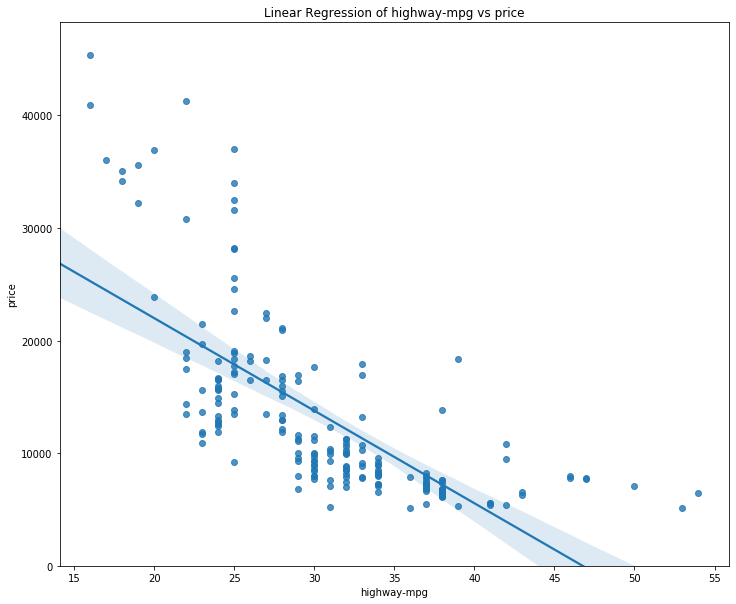

In [6]:
# calling function on df['highway-mpg'] and df['price']
linear_regression_modeling(df[['highway-mpg']],df['price'])

In [7]:
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

## Predict Price against Peak-rpm

The intercept of the regression line is 21851.01468613981
The slope of the regression line is [-1.68902902]

    𝑌ℎ𝑎𝑡 = intercept (a) + slope (b) * 𝑋 
Plugging in the actual values the linear regression formula:
price = 21851.01468613981 + [-1.68902902] * (peak-rpm)


The R-square is: 0.010325785864205628
We can say that ~1.03% of the variation of the price is explained by this simple linear model fitted with peak-rpm.

The mean square error of price and predicted value is:  62192765.692737065


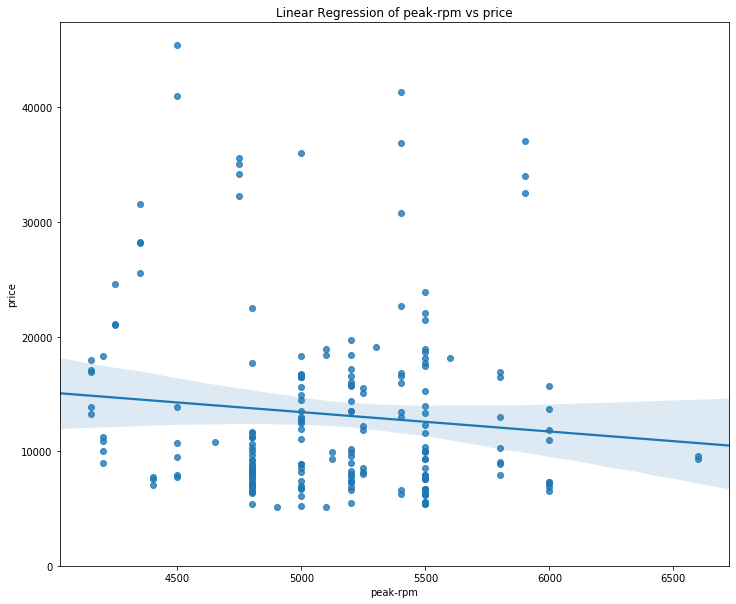

In [8]:
linear_regression_modeling(df[['peak-rpm']],df['price'])

In [9]:
Yhat[:5]

array([13405.86957428, 13405.86957428, 13405.86957428, 12561.35506309,
       12561.35506309])

## Predict Price against Horsepower

The intercept of the regression line is -4597.558297892905
The slope of the regression line is [172.18312191]

    𝑌ℎ𝑎𝑡 = intercept (a) + slope (b) * 𝑋 
Plugging in the actual values the linear regression formula:
price = -4597.558297892905 + [172.18312191] * (horsepower)


The R-square is: 0.6554109795391572
We can say that ~65.54% of the variation of the price is explained by this simple linear model fitted with horsepower.

The mean square error of price and predicted value is:  21654544.39825428


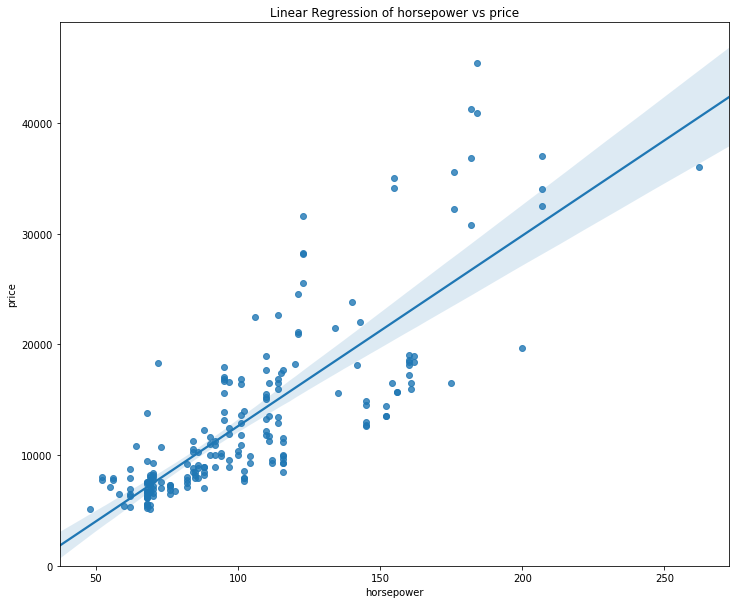

In [10]:
linear_regression_modeling(df[['horsepower']],df['price'])

In [11]:
Yhat[:5]

array([14514.76823442, 14514.76823442, 21918.64247666, 12965.1201372 ,
       15203.50072207])

## Predict Price against Curb-weight

The intercept of the regression line is -19553.570636227472
The slope of the regression line is [12.818847]

    𝑌ℎ𝑎𝑡 = intercept (a) + slope (b) * 𝑋 
Plugging in the actual values the linear regression formula:
price = -19553.570636227472 + [12.818847] * (curb-weight)


The R-square is: 0.6962476008164489
We can say that ~69.62% of the variation of the price is explained by this simple linear model fitted with curb-weight.

The mean square error of price and predicted value is:  19088303.52574716


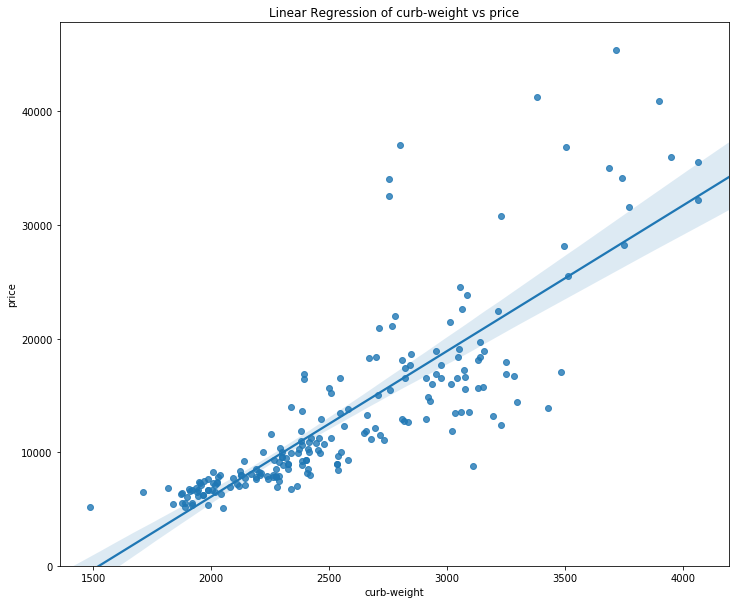

In [12]:
linear_regression_modeling(df[['curb-weight']],df['price'])

In [13]:
Yhat[:5]

array([13108.85152621, 13108.85152621, 16634.03445191, 10404.07480868,
       16646.85329891])

## Predict Price against Engine-size

The intercept of the regression line is -7963.338906281024
The slope of the regression line is [166.86001569]

    𝑌ℎ𝑎𝑡 = intercept (a) + slope (b) * 𝑋 
Plugging in the actual values the linear regression formula:
price = -7963.338906281024 + [166.86001569] * (engine-size)


The R-square is: 0.7609686443622008
We can say that ~76.1% of the variation of the price is explained by this simple linear model fitted with engine-size.

The mean square error of price and predicted value is:  15021126.02517414


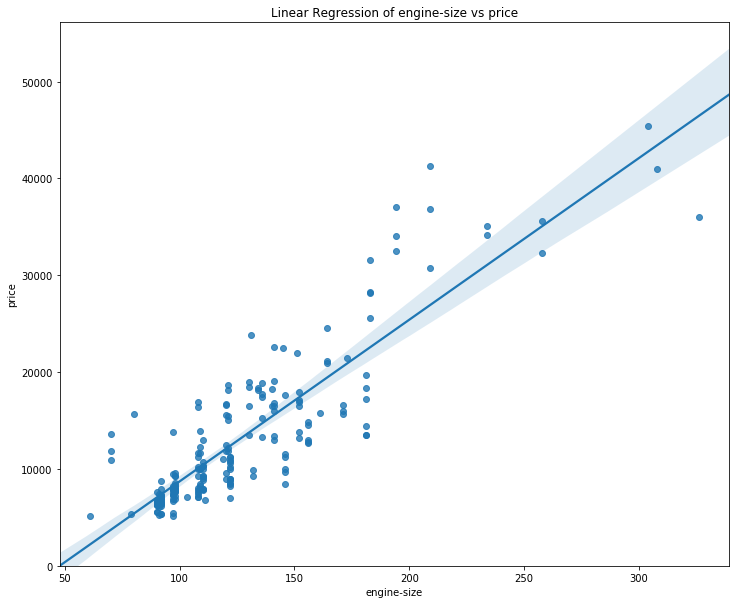

In [14]:
linear_regression_modeling(df[['engine-size']],df['price'])

In [15]:
Yhat[:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [16]:
# rechecking correlation
df[['horsepower', 'curb-weight',"peak-rpm","highway-mpg","engine-size","price"]].corr()

,horsepower,curb-weight,peak-rpm,highway-mpg,engine-size,price
horsepower,1.000000,0.757976,0.107885,-0.804575,0.822676,0.809575
curb-weight,0.757976,1.000000,-0.279361,-0.794889,0.849072,0.834415
peak-rpm,0.107885,-0.279361,1.000000,-0.058598,-0.256733,-0.101616
highway-mpg,-0.804575,-0.794889,-0.058598,1.000000,-0.679571,-0.704692
engine-size,0.822676,0.849072,-0.256733,-0.679571,1.000000,0.872335
price,0.809575,0.834415,-0.101616,-0.704692,0.872335,1.000000


# Multiple Linear Regression

𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + 𝑏4 𝑋4 ...

## Multiple Linear Regression using Horsepower, Curb-weight, Highway-mpg, Engine-size against Price

In [17]:
mlr = LinearRegression()

In [18]:
Z = df[['horsepower', 'curb-weight','highway-mpg','engine-size']]

In [19]:
Z

,horsepower,curb-weight,highway-mpg,engine-size
0,111.0,2548,27,130
1,111.0,2548,27,130
2,154.0,2823,26,152
3,102.0,2337,30,109
4,115.0,2824,22,136
...,...,...,...,...
196,114.0,2952,28,141
197,160.0,3049,25,141
198,134.0,3012,23,173
199,106.0,3217,27,145


In [20]:
mlr.fit(Z,df['price'])
print(f'Intercept value of the regression object {mlr.intercept_}')
print(f'Coefficient values of the regression object {mlr.coef_}')

Intercept value of the regression object -15806.62462632922
Coefficient values of the regression object [53.49574423  4.70770099 36.05748882 81.53026382]


In [21]:
Yhat_mlr = mlr.predict(Z)
print(f'The R-square is: ', mlr.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [22]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Yhat_mlr))

The mean square error of price and predicted value using multifit is:  11980366.87072649


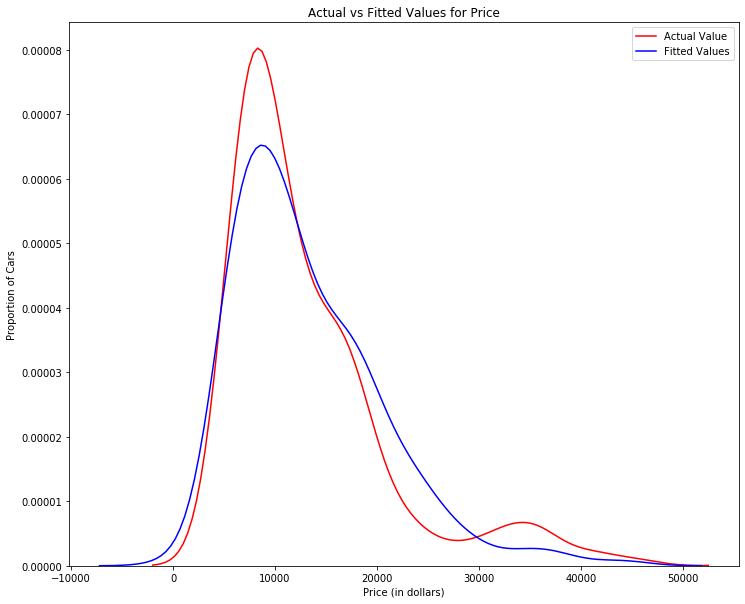

In [23]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Function

In [24]:
def multi_linear_regression_modeling(independent_variable,dependent_variable):
    #  fitting the independent variable(X) and the dependent variable(Y) to Linear Regression object (for easier calling)
    globals () ['mlr'] = LinearRegression().fit(independent_variable,dependent_variable)
    # assigning predictions to global variable (Yhat_mlr) to be called outside of function, using independent variable(X)
    globals() ['Yhat_mlr'] = mlr.predict(independent_variable)
    globals() ['columns_used'] = [independent_variable.columns[i] for i,value in enumerate(independent_variable.columns)]
    
    ##     𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + 𝑏4 𝑋4 ...     ##
    # intercept (a)
    print(f'The intercept of the regression line is {mlr.intercept_}')
    # slope (b)
    print(f'The slopes of the regression line is {mlr.coef_}')
    print('\n\033[1m    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... \nPlugging in the actual values the multiple linear regression formula:\033[0m')
    
    
    # printing the multiple linear regression formula with variables plugged in
    formula = (f'\033[1m{dependent_variable.name}\033[0m = {mlr.intercept_}')
    for i,col in enumerate(independent_variable.columns):
        slope_times_feature = f' + ({mlr.coef_[i]} * \033[1m{independent_variable.columns[i]}\033[0m)'
        formula += str(slope_times_feature)
    print(formula)   
    
    globals() ['r_square'] = mlr.score(independent_variable,dependent_variable)
    print(f'\n\n\033[1mThe R-square is: {r_square}\033[0m')
    print(f'We can say that \033[1m~{round(r_square*100,2)}%\033[0m of the variation of the {dependent_variable.name} is explained by this multiple linear model fitted with \033[1m{columns_used}\033[0m.\n')
    globals() ['mse'] = mean_squared_error(dependent_variable, Yhat_mlr)
    print(f'\033[1mThe mean square error of price and predicted values is: \033[0m', mse)
    
    
    plt.figure(figsize=(12, 10))
    ax1 = sns.distplot(dependent_variable, hist=False, color="r", label="Actual Value")
    sns.distplot(Yhat_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title(f'Actual vs Fitted Values for {dependent_variable.name.title()}')
    plt.xlabel(dependent_variable.name.title())
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [25]:
# function for multiple linear regression with cross validation

def cv_multi_linear_regression_modeling(independent_variable,dependent_variable,folds):
    globals () ['X_train', 'X_test', 'y_train', 'y_test'] = train_test_split(independent_variable,dependent_variable,test_size=0.3, random_state=3)
   
    globals() ['columns_used'] = [independent_variable.columns[i] for i,value in enumerate(independent_variable.columns)]
    
    ##     𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + 𝑏4 𝑋4 ...     ##
    # intercept (a)
    print(f'The intercept of the regression line is {mlr.intercept_}')
    # slope (b)
    print(f'The slopes of the regression line are {mlr.coef_}')
    print('\n\033[1m    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... \nPlugging in the actual values the multiple linear regression formula:\033[0m')
    
    #  fitting the independent variable(X) and the dependent variable(Y) to Linear Regression object (for easier calling)
    globals () ['mlr'] = LinearRegression().fit(X_train,y_train)
    
    # printing the multiple linear regression formula with variables plugged in 
    formula = (f'\033[1m[{dependent_variable.name.upper()}]\033[0m = {mlr.intercept_}')
    for i,col in enumerate(independent_variable.columns):
        slope_times_feature = f' + ({mlr.coef_[i]} * \033[1m{independent_variable.columns[i]}\033[0m)'
        formula += str(slope_times_feature)
    print(formula) 
  
    # assigning predictions to global variable (Yhat_mlr) to be called outside of function, using X_train
    globals() ['Yhat_mlr'] = cross_val_predict(mlr, X_train,y_train, cv = folds)
    
    def get_cv_scores(model,folds):
        globals() ['cv_scores'] = cross_val_score(model,
                                                  X_train, 
                                                  y_train,
                                                  cv=folds,
                                                  scoring='r2')
    get_cv_scores(mlr,folds)
  
    globals() ['CV_r_square'] = np.mean(cv_scores)
    print(f'\n\n\033[1mThe Avg cross validation R-square (with {folds} folds) is: {CV_r_square}\033[0m')
    globals() ['STD'] = np.std(cv_scores)
    print(f'\n\033[1mWith a Standard Diviation of the R-squares: {STD}\n\033[0m')

    print(f'We can say that \033[1m~{round(CV_r_square*100,2)}%\033[0m of the variation of the {dependent_variable.name} is explained by this multiple linear model fitted with \033[1m{columns_used}\033[0m.\n')
    globals() ['mse'] = mean_squared_error(y_train, Yhat_mlr)
    print(f'\033[1mThe mean square error of predicted values is: \033[0m', mse)
    
  
    #plotting differences betwwen actual and predicted values
    
    plt.figure(figsize=(12, 10))
    #plotting actual target values
    ax1 = sns.distplot(dependent_variable, hist=False, color="r", label="Actual Value")
    #plotting predicted target values
    sns.distplot(Yhat_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)
    
    plt.title(f'Actual vs Fitted Values for {dependent_variable.name.title()}')
    plt.xlabel(dependent_variable.name.title())
    plt.ylabel('Proportion based on total count')
    plt.show()
    plt.close()

The intercept of the regression line is -15806.62462632922
The slopes of the regression line is [53.49574423  4.70770099 36.05748882 81.53026382]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... 
Plugging in the actual values the multiple linear regression formula:
price = -15806.62462632922 + (53.49574422604911 * horsepower) + (4.707700994613942 * curb-weight) + (36.05748881648583 * highway-mpg) + (81.53026382122758 * engine-size)


The R-square is: 0.8093562806577457
We can say that ~80.94% of the variation of the price is explained by this multiple linear model fitted with ['horsepower', 'curb-weight', 'highway-mpg', 'engine-size'].

The mean square error of price and predicted values is:  11980366.87072649


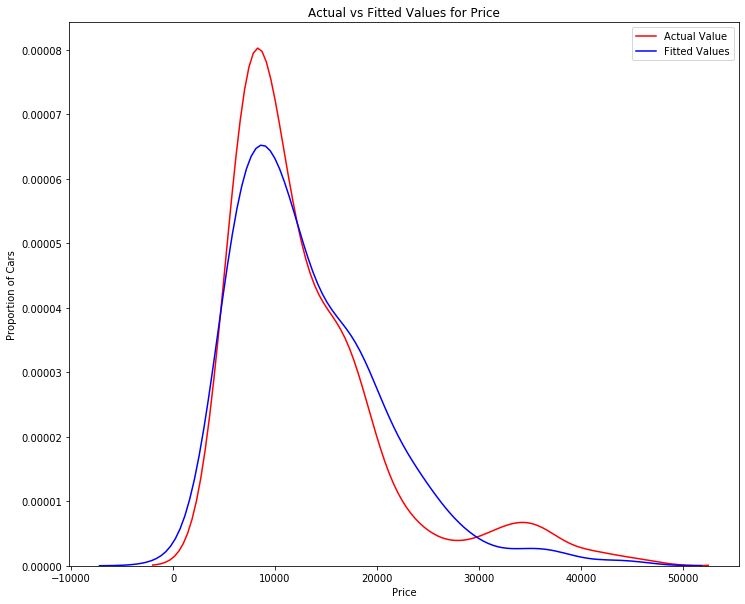

In [26]:
multi_linear_regression_modeling(Z,df['price'])


## Multiple Linear Regression using Normalized-losses, Highway-mpg against Price

Intercept value of the regression object 38201.313272457264
Coefficient values of the regression object [   1.49789586 -820.45434016]


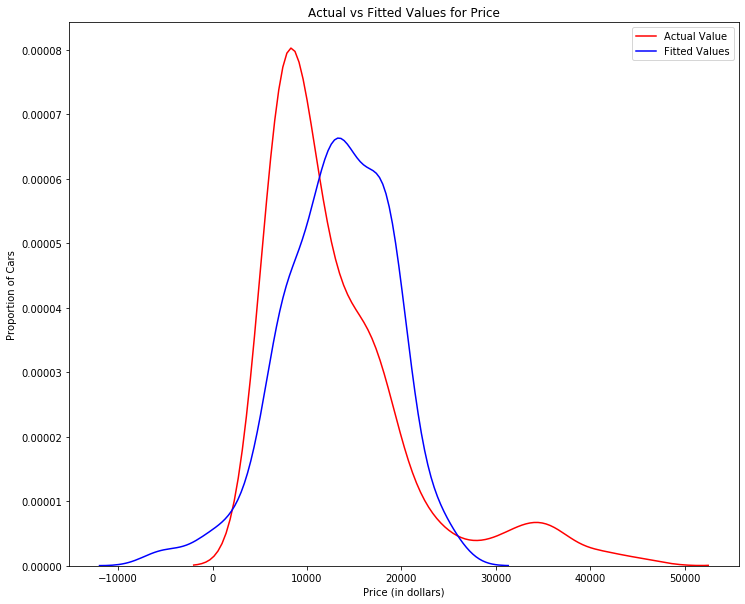

In [27]:
mlr2 = LinearRegression()
mlr2.fit(df[['normalized-losses','highway-mpg']],df['price'])
print(f'Intercept value of the regression object {mlr2.intercept_}')
print(f'Coefficient values of the regression object {mlr2.coef_}')

Yhat3 = mlr2.predict(df[['normalized-losses','highway-mpg']])

plt.figure(figsize=(12, 10))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The intercept of the regression line is 38201.313272457264
The slopes of the regression line is [   1.49789586 -820.45434016]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... 
Plugging in the actual values the multiple linear regression formula:
price = 38201.313272457264 + (1.4978958634133455 * normalized-losses) + (-820.4543401631862 * highway-mpg)


The R-square is: 0.4966263556974878
We can say that ~49.66% of the variation of the price is explained by this multiple linear model fitted with ['normalized-losses', 'highway-mpg'].

The mean square error of price and predicted values is:  31632832.975589428


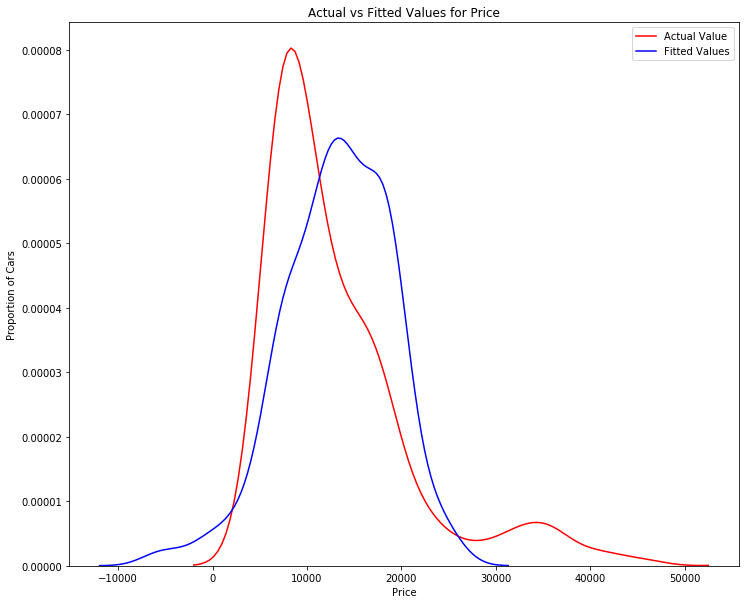

In [28]:
multi_linear_regression_modeling(df[['normalized-losses','highway-mpg']],df['price'])

# Polynomial Regression

In [29]:
from sklearn.metrics import r2_score

def PlotPolly(independent_variable, dependent_variable, Power):
    print('\033[1mY = a + b_1 X^2 +b_2 X^2 + ...\033[0m')
    print('\n')
    globals() ['Fit_'+str(Power)] = np.polyfit(independent_variable, dependent_variable, Power)
    if Power == 2:
        print(f'Polynomial Regression fit to the {Power}nd order:')
    elif Power == 3:
        print(f'Polynomial Regression fit to the {Power}rd order:')
    else:
        print(f'Polynomial Regression fit to the {Power}th order:')
        
    print(np.array(eval(f'Fit_'+str(Power))))
    print('\nPlugging in values into the formula')
    
    f = np.polyfit(independent_variable, dependent_variable, Power)
    globals() ['model_'+str(Power)] = np.poly1d(f)
    print(eval('model_'+str(Power)))
    
    
    x_new = np.linspace(15, 55, 100)
    y_new = eval('model_'+str(Power))(x_new)
    r_score = r2_score(dependent_variable, eval('model_'+str(Power))(independent_variable))
    mse = mean_squared_error(dependent_variable, eval('model_'+str(Power))(independent_variable))
    
    
    plt.figure(figsize=(12, 10))
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(f'{independent_variable.name.title()}')
    plt.ylabel(f'{dependent_variable.name.title()} of Cars')


    plt.show()
    plt.close
    
    print('\n\n\033[1mThe R-square is: \033[0m' , r_score)
    print(f'We can say that ~{ round(r_score,3)}% of the variation of the {dependent_variable.name} is explained by this Polynomial Regression model fitted with {independent_variable.name}.')
    print(f'\n\n\033[1mThe Mean squared error is: \033[0m{mse}')

Y = a + b_1 X^2 +b_2 X^2 + ...


Polynomial Regression fit to the 2nd order:
[ 4.53521031e+01 -3.77328655e+03  8.41938778e+04]

Plugging in values into the formula
       2
45.35 x - 3773 x + 8.419e+04


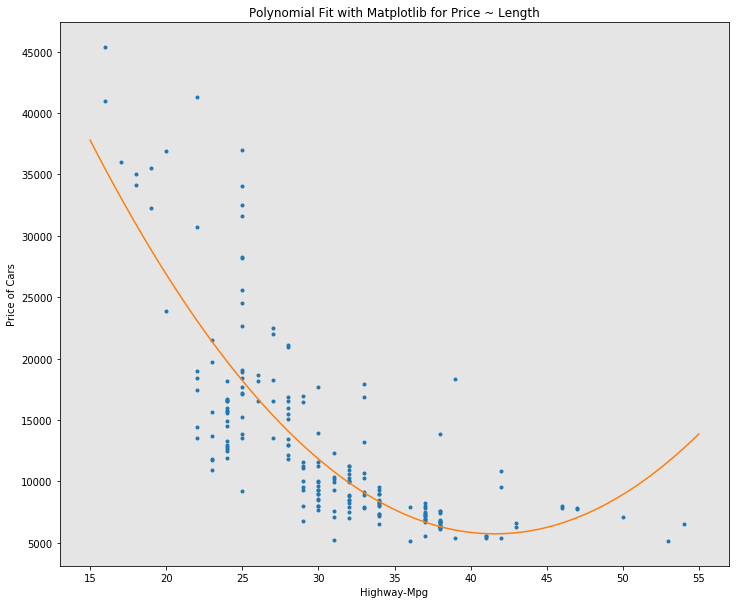



The R-square is:  0.6517936037026724
We can say that ~0.652% of the variation of the price is explained by this Polynomial Regression model fitted with highway-mpg.


The Mean squared error is: 21881866.28318136


In [30]:
PlotPolly(df['highway-mpg'],df['price'],2)

## Polynomial fit of Highway-MPG against Price of the 3rd order

Y = a + b_1 X^2 +b_2 X^2 + ...


Polynomial Regression fit to the 3rd order:
[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]

Plugging in values into the formula
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


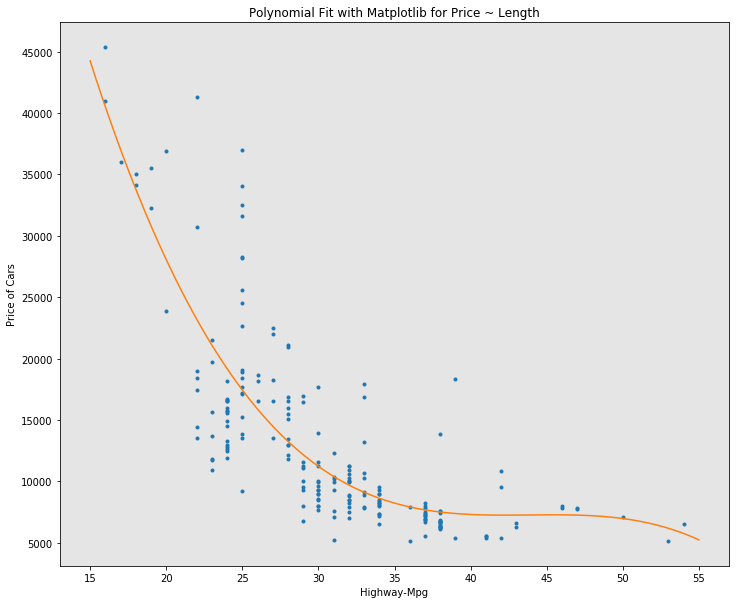



The R-square is:  0.674194666390652
We can say that ~0.674% of the variation of the price is explained by this Polynomial Regression model fitted with highway-mpg.


The Mean squared error is: 20474146.426361207


In [31]:
PlotPolly(df['highway-mpg'],df['price'],3)

## Polynomial fit of Highway-MPG against Price of the 4th order

Y = a + b_1 X^2 +b_2 X^2 + ...


Polynomial Regression fit to the 4th order:
[ 2.65088385e-02 -5.17010163e+00  3.81976935e+02 -1.26673852e+04
  1.65673357e+05]

Plugging in values into the formula
         4        3       2
0.02651 x - 5.17 x + 382 x - 1.267e+04 x + 1.657e+05


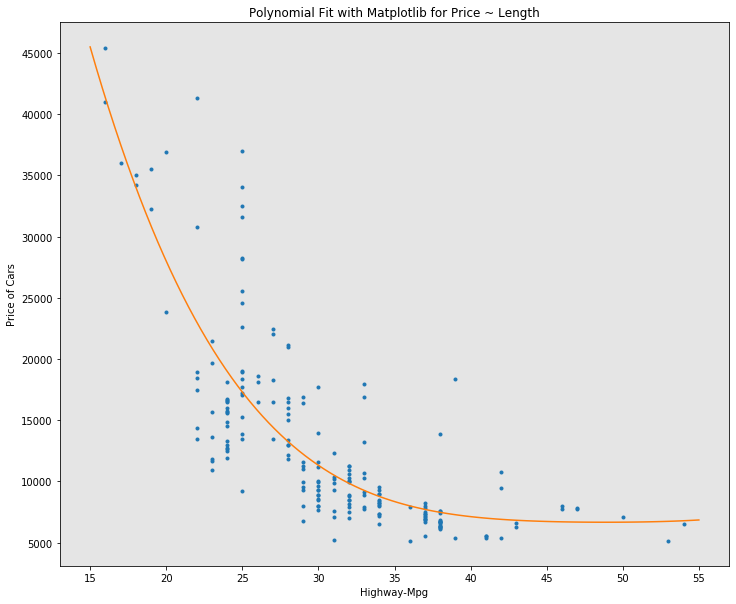



The R-square is:  0.6748405169870645
We can say that ~0.675% of the variation of the price is explained by this Polynomial Regression model fitted with highway-mpg.


The Mean squared error is: 20433560.10589183


In [32]:
PlotPolly(df['highway-mpg'],df['price'],4)

## Polynomial fit of Highway-MPG against Price of the 5th order

Y = a + b_1 X^2 +b_2 X^2 + ...


Polynomial Regression fit to the 5th order:
[-6.99832843e-03  1.22284271e+00 -8.43003409e+01  2.90845868e+03
 -5.15209922e+04  3.95385040e+05]

Plugging in values into the formula
           5         4        3        2
-0.006998 x + 1.223 x - 84.3 x + 2908 x - 5.152e+04 x + 3.954e+05


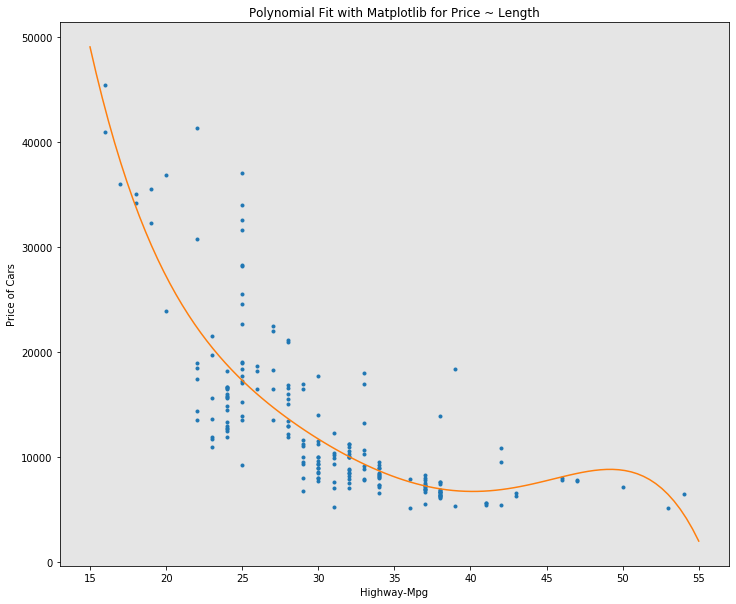



The R-square is:  0.6788068173943975
We can say that ~0.679% of the variation of the price is explained by this Polynomial Regression model fitted with highway-mpg.


The Mean squared error is: 20184311.223404102


In [33]:
PlotPolly(df['highway-mpg'],df['price'],5)

## Polynomial fit of Highway-MPG against Price of the 11th order

Y = a + b_1 X^2 +b_2 X^2 + ...


Polynomial Regression fit to the 11th order:
[-1.24263436e-08  4.72185065e-06 -8.02843778e-04  8.05640603e-02
 -5.29741180e+00  2.39470420e+02 -7.58846032e+03  1.68447320e+05
 -2.56531255e+06  2.55140727e+07 -1.49107027e+08  3.87930256e+08]

Plugging in values into the formula
            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


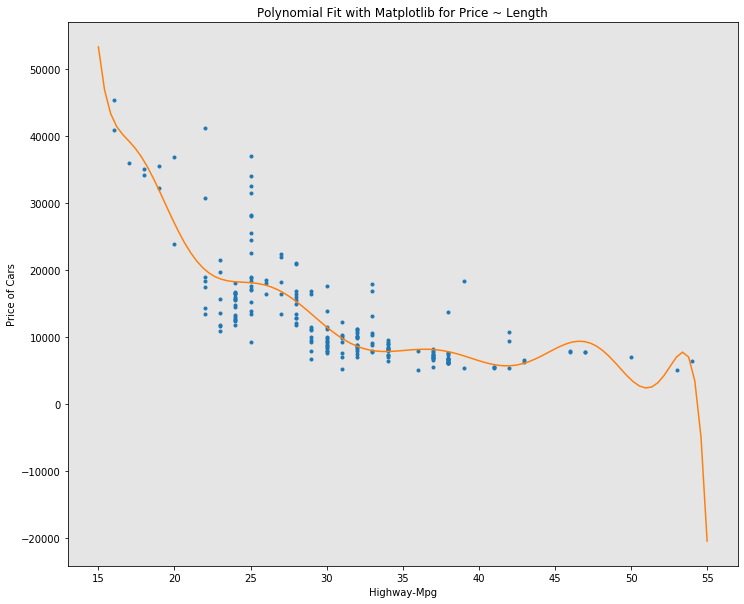



The R-square is:  0.7023769090445657
We can say that ~0.702% of the variation of the price is explained by this Polynomial Regression model fitted with highway-mpg.


The Mean squared error is: 18703127.651661452


In [34]:
PlotPolly(df['highway-mpg'],df['price'],11)

# Polynomial transform on multiple features

In [35]:
from sklearn.preprocessing import PolynomialFeatures

def poly_transform(multiple_column_independent_variables,degrees):
    globals()['pt'] = PolynomialFeatures(degree=degrees)
    print(pt)
    globals()[f'Z_pt_'+str(degrees)] = pt.fit_transform(Z)
    print(f"The original data is of {Z.shape[0]} samples and {Z.shape[1]} features    ----->    shape {Z.shape}")
    print(f"After the polynomial transformation of {degrees} degrees, there are {eval(f'Z_pt_'+str(degrees)).shape[0]} samples and {eval(f'Z_pt_'+str(degrees)).shape[1]} features    ----->    shape {eval(f'Z_pt_'+str(degrees)).shape}")

In [36]:
poly_transform(Z,2)

PolynomialFeatures()
The original data is of 201 samples and 4 features    ----->    shape (201, 4)
After the polynomial transformation of 2 degrees, there are 201 samples and 15 features    ----->    shape (201, 15)


# Pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def make_pipline(pipeInputs,independent_variable, dependent_variable, number_of_predictions_to_return):
    
    globals() ['pipe']=Pipeline(pipeInputs)
    print(pipe)
    pipe.fit(independent_variable, dependent_variable)
    globals() ['yhat_pipe']=pipe.predict(independent_variable)
    globals() ['columns_used'] = [independent_variable.columns[i] for i,value in enumerate(independent_variable.columns)]
    
    # score #
    print(f'\n\n\033[1mThe R-square is: \033[0m{pipe.score(independent_variable,dependent_variable)}')
    print(f'We can say that \033[1m~{ round(pipe.score(independent_variable,dependent_variable)*100,2)}%\033[0m of the variation of the \033[1m{dependent_variable.name}\033[0m is explained by this multiple linear model fitted with \033[1m{columns_used}\033[0m.\n')
    mse = mean_squared_error(df['price'], eval('yhat_pipe'))
    print(f'\033[1mThe mean square error of price and predicted values is: \033[0m', mse)
    
    # how many predictions to return #
    if number_of_predictions_to_return == 0:
        print(f'\nAll predictions using pipline {[i[0] for i in pipeInputs]}')
        return yhat_pipe[0:]
    else:
        print(f'\n1st {number_of_predictions_to_return} predictions using pipline {[i[0] for i in pipeInputs]}')
        return yhat_pipe[0:number_of_predictions_to_return]
    

##  1st 10 predictions using Pipeline [StandardScaler, LinearRegression] on horsepower, curb-weight, highway-mpg, engine-size against price

In [38]:
Inputs2=[('scale',StandardScaler()),('linear',LinearRegression())]
make_pipline(Inputs2,Z,df['price'],10)

Pipeline(steps=[('scale', StandardScaler()), ('linear', LinearRegression())])


The R-square is: 0.8093562806577457
We can say that ~80.94% of the variation of the price is explained by this multiple linear model fitted with ['horsepower', 'curb-weight', 'highway-mpg', 'engine-size'].

The mean square error of price and predicted values is:  11980366.87072649

1st 10 predictions using pipline ['scale', 'linear']


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## 1st 5 predictions using Pipeline [StandardScaler,  PolynomialFeatures, LinearRegression] on horsepower, curb-weight, highway-mpg, engine-size against price

In [39]:
Inputs = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('linear',LinearRegression())]
make_pipline(Inputs,Z,df['price'],5)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])


The R-square is: 0.8463341969864728
We can say that ~84.63% of the variation of the price is explained by this multiple linear model fitted with ['horsepower', 'curb-weight', 'highway-mpg', 'engine-size'].

The mean square error of price and predicted values is:  9656613.4039896

1st 5 predictions using pipline ['scale', 'polynomial', 'linear']


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

## All predictions using Pipeline [StandardScaler,  PolynomialFeatures, LinearRegression] on horsepower, curb-weight, highway-mpg, engine-size against price

In [40]:
steps = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('linear',LinearRegression())]
make_pipline(steps,Z,df['price'],0)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])


The R-square is: 0.8463341969864728
We can say that ~84.63% of the variation of the price is explained by this multiple linear model fitted with ['horsepower', 'curb-weight', 'highway-mpg', 'engine-size'].

The mean square error of price and predicted values is:  9656613.4039896

All predictions using pipline ['scale', 'polynomial', 'linear']


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      